In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import gridspec
import warnings



In [2]:
df = pd.read_csv("../Data/cleaned.csv")
f1 = df["victim"] == 'Yes'
f2 = df["victim"] == 'No'
df.shape

(1025, 61)

# 2- Factors

### #The less security apps the higher potential of becoming a victim 

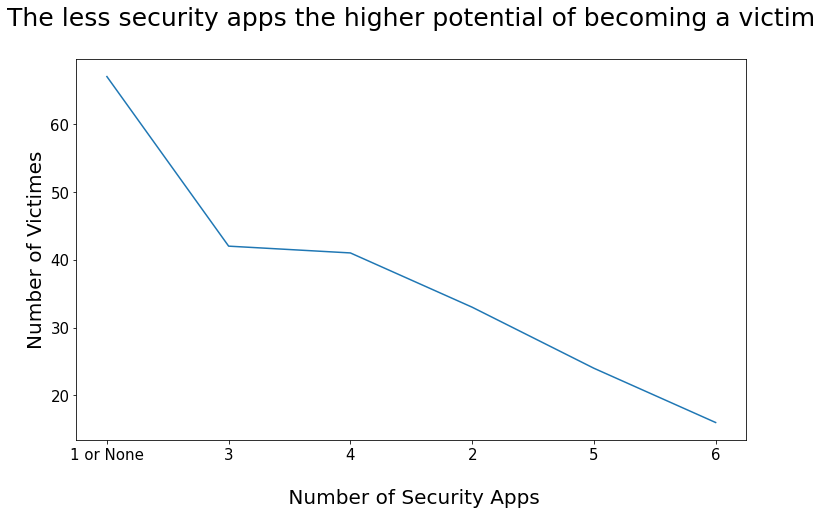

In [3]:
df['security_apps'] = df.security_apps.str.replace('(e.g. password, PIN) ?' , '')
df['security_apps'] = df.security_apps.str.replace('() ?' , '')
# df["security_apps"]=df["security_apps"].str.split(',').str.len()

new_security_apps=[]

for i in df["security_apps"]:
    if i == 'None':
        new_security_apps.append('None')
    else:
        new_security_apps.append(i.count(',')+1)
        

df['new_security_apps']=new_security_apps

df["new_security_apps"] = df["new_security_apps"].replace([1,2,3,4,5,6,'None'],
                                                ['1 or None','2','3','4','5','6','1 or None' ])


plt.figure(figsize=(12,7))
a= sns.lineplot(x=df[f1]["new_security_apps"].value_counts().index, y=df[f1]["new_security_apps"].value_counts().values, data=f1, palette=sns.color_palette("PuBu_r",1),alpha=1)
a.set_title('The less security apps the higher potential of becoming a victim\n ', size=25, y=1)
a.set_xlabel('\n Number of Security Apps', fontsize='20', horizontalalignment='center')
a.set_ylabel('Number of Victimes', fontsize='20', horizontalalignment='center')
a.tick_params(axis='both', labelsize=15)
plt.show()
# plt.savefig('plot.png', bbox_inches='tight')
# plt.savefig('plot.jpg', bbox_inches='tight')


### #Which type of attacks has the most effect on becoming a victim?

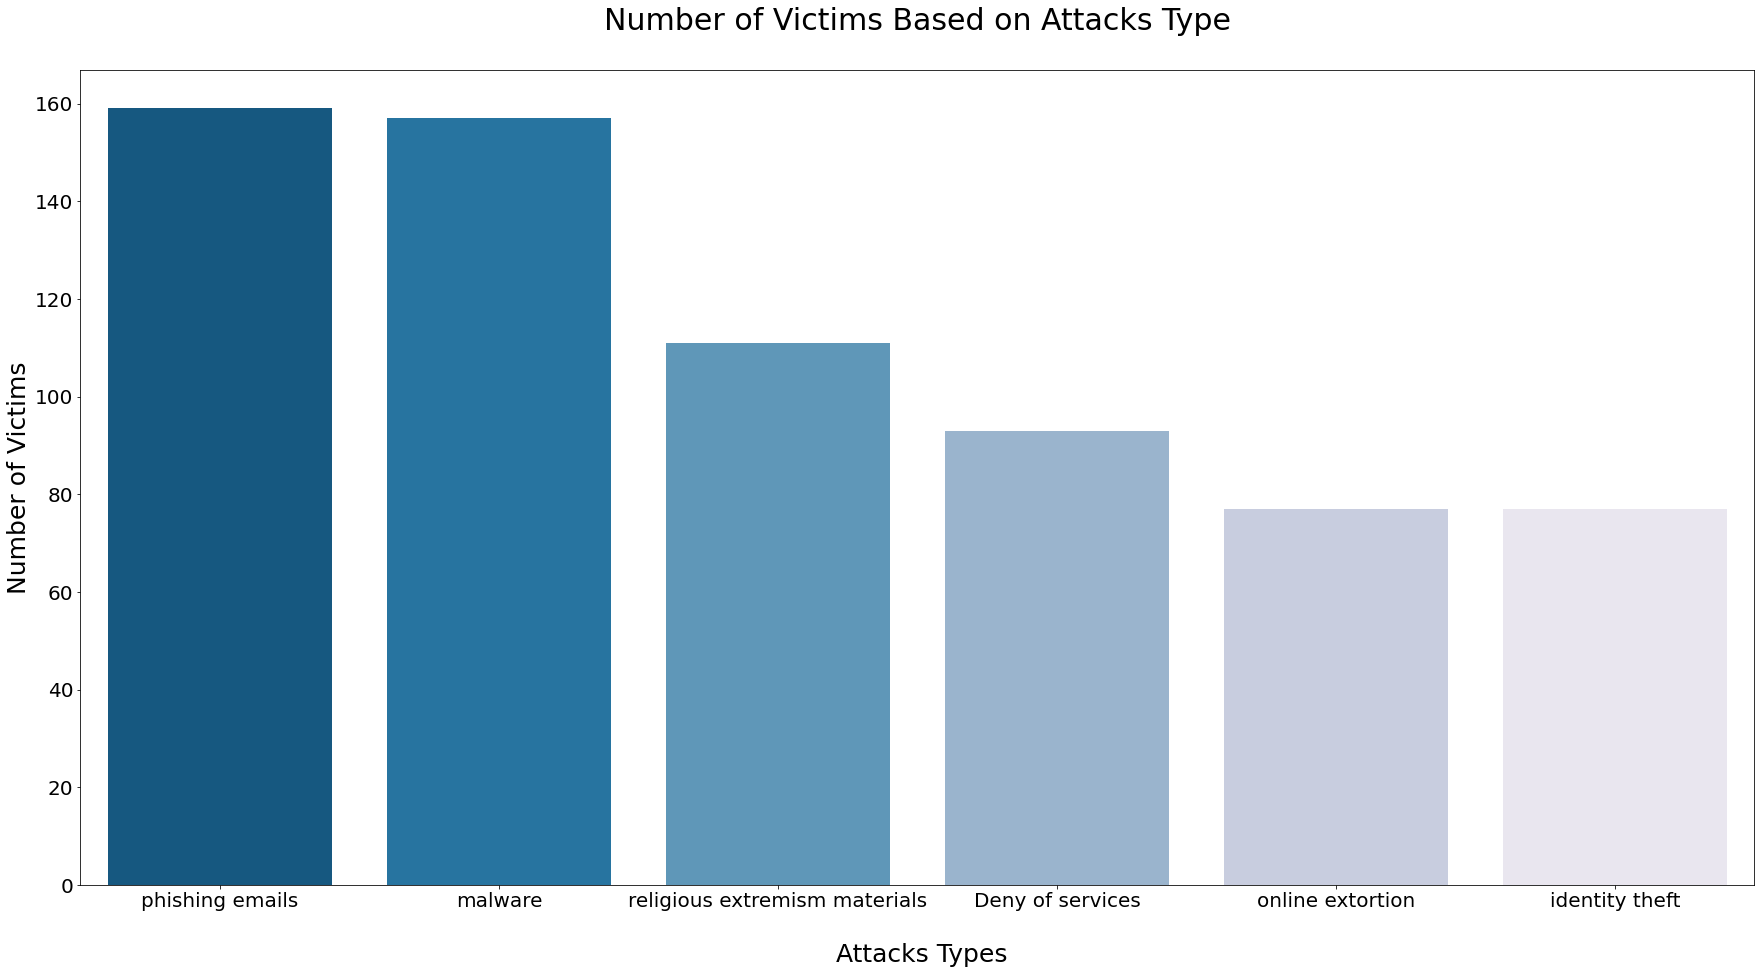

In [4]:
attack_dataset = pd.read_excel("../Data/attack dataset.xlsx")
plt.figure(figsize=(30,15))

a= sns.barplot(x= "attack_name",y = "total" , data=attack_dataset,
               order=attack_dataset.sort_values('total',ascending = False).attack_name, palette=sns.color_palette("PuBu_r",6),alpha=1)
a.set_title('Number of Victims Based on Attacks Type\n ', size=30, y=1)
a.set_xlabel('\n Attacks Types', fontsize='25', horizontalalignment='center')
a.set_ylabel('Number of Victims', fontsize='25', horizontalalignment='center')
a.tick_params(axis='both', labelsize=20)
plt.show()
# plt.savefig('plot.png', bbox_inches='tight')
# plt.savefig('plot.jpg', bbox_inches='tight')


### #Which purpose has the most effect on becoming a victim?  

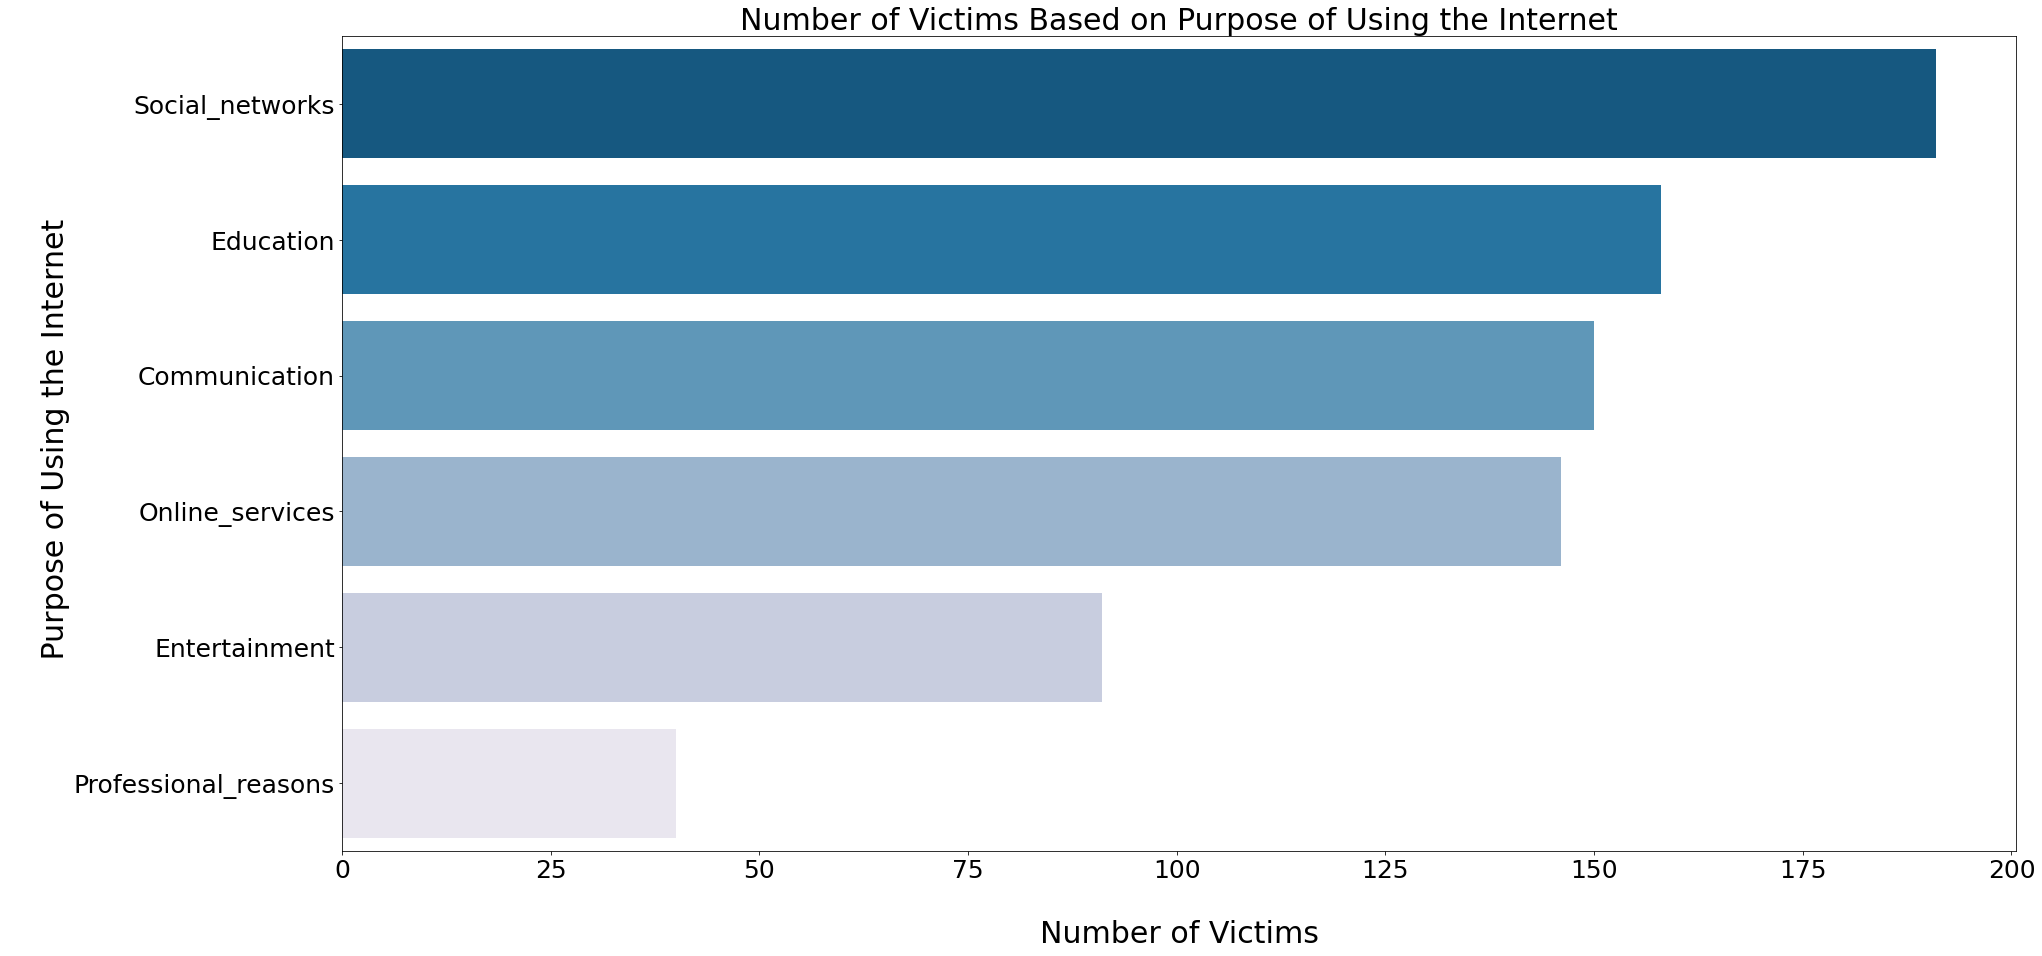

In [5]:
used_purpose_dataset = pd.read_csv("../Data/used_purpose_dataset.csv")
used_purpose_dataset.columns = ['name', 'used_purpose']
plt.figure(figsize = (30,15))
a= sns.barplot(x='used_purpose',y = "name" , data=used_purpose_dataset, 
               order=used_purpose_dataset.sort_values('used_purpose',ascending = False).name,palette=sns.color_palette("PuBu_r",6),alpha=1)
a.set_title('Number of Victims Based on Purpose of Using the Internet', size=30, y=1)
a.set_ylabel('\n Purpose of Using the Internet', fontsize='30', horizontalalignment='center')
a.set_xlabel('\nNumber of Victims', fontsize='30', horizontalalignment='center')
a.tick_params(axis='both', labelsize=25)
plt.show()
# plt.savefig('plot.png', bbox_inches='tight')
# plt.savefig('plot.jpg', bbox_inches='tight')

### #The more good practices you follow the less potential of becoming a victim. 

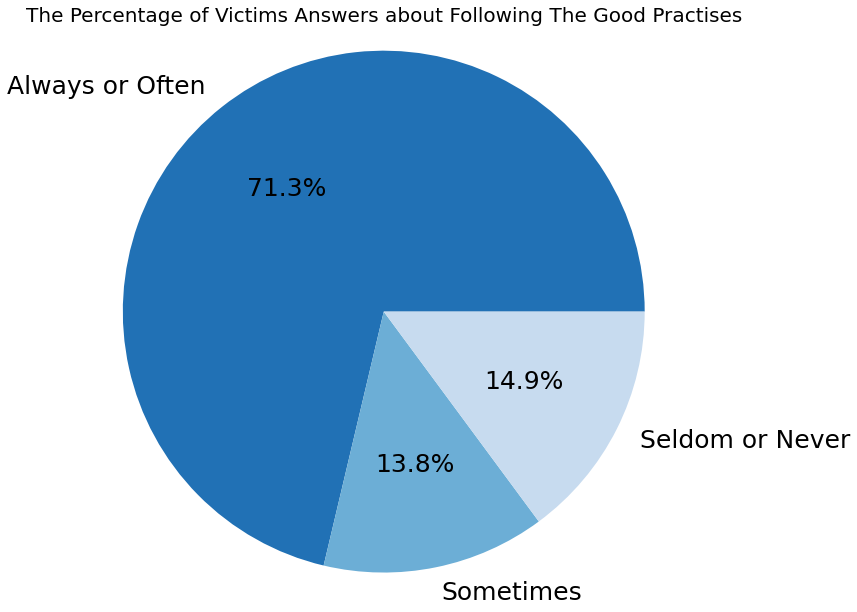

In [6]:

cols = ["careful_clicking_on_links","install_software_updates","change_pass_frequently",
            "terms_conditions","privacy_settings","check_legitimacy"]

for i in cols:   
    df[i] = df[i].replace(['Always','Often','Sometimes','Seldom','Never'],
                        ['Always or Often','Always or Often','Sometimes','Seldom or Never','Seldom or Never'])
    
for i in cols:   
    df_practise = df[f1][i].value_counts().to_frame()
#     del df_practise["total"]
    df_practise["total"] = df_practise.sum(axis=1)

for i in cols:   
    df_practise[i] = df[f1][i].value_counts().to_frame()
#     del df_practise["total"]
    df_practise["total"] = df_practise.sum(axis=1)
    
for i in cols:   
    df_practise[i] = df[f1][i].value_counts().to_frame()
    del df_practise["total"]
    df_practise["total"] = df_practise.sum(axis=1)
    

df_practise
textprops = {"fontsize":25}
df_practise.plot.pie(y='total', figsize=(8, 8),  autopct='%1.1f%%', legend=False,colors= sns.color_palette("Blues_r",3), wedgeprops={'alpha':1},radius = 1.5,textprops=textprops)
plt.title("The Percentage of Victims Answers about Following The Good Practises\n\n\n",size=20, y=1)
plt.axis('off')
plt.show();


# 3- Awareness

### #People always receive threats/attacks 

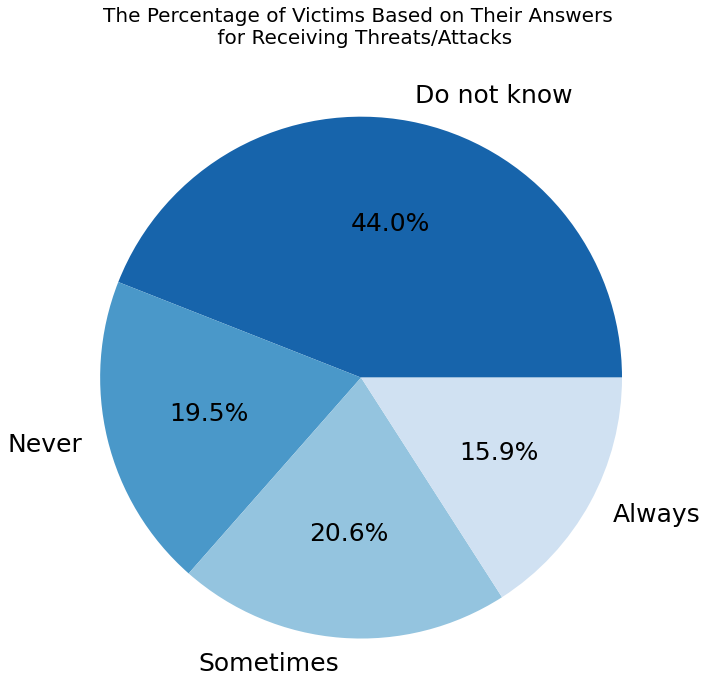

In [7]:
col_names = ["phishing_emails","identity_theft","malware",
             "unable_access_online","encountering_extremism",
             "online_extortion"]

for i in col_names:
    valdf = df[i].value_counts().to_frame()
#     del valdf["total"]
    valdf["total"] = valdf.sum(axis=1)
    
for i in col_names:
    valdf[i] = df[i].value_counts().to_frame()
#     del valdf["total"]
    valdf["total"] = valdf.sum(axis=1)

for i in col_names:
    valdf[i] = df[i].value_counts().to_frame()
    del valdf["total"]
    valdf["total"] = valdf.sum(axis=1)
    
textprops = {"fontsize":25}
valdf.plot.pie(y='total', figsize=(8, 8),  autopct='%1.1f%%', legend=False,colors= sns.color_palette("Blues_r",4), wedgeprops={'alpha':1},radius = 1.5,textprops=textprops)
plt.title("The Percentage of Victims Based on Their Answers \n for Receiving Threats/Attacks\n\n\n\n\n",size=20, y=1)
plt.axis('off')
plt.show();


### #The more security level the the less potential of becoming victim

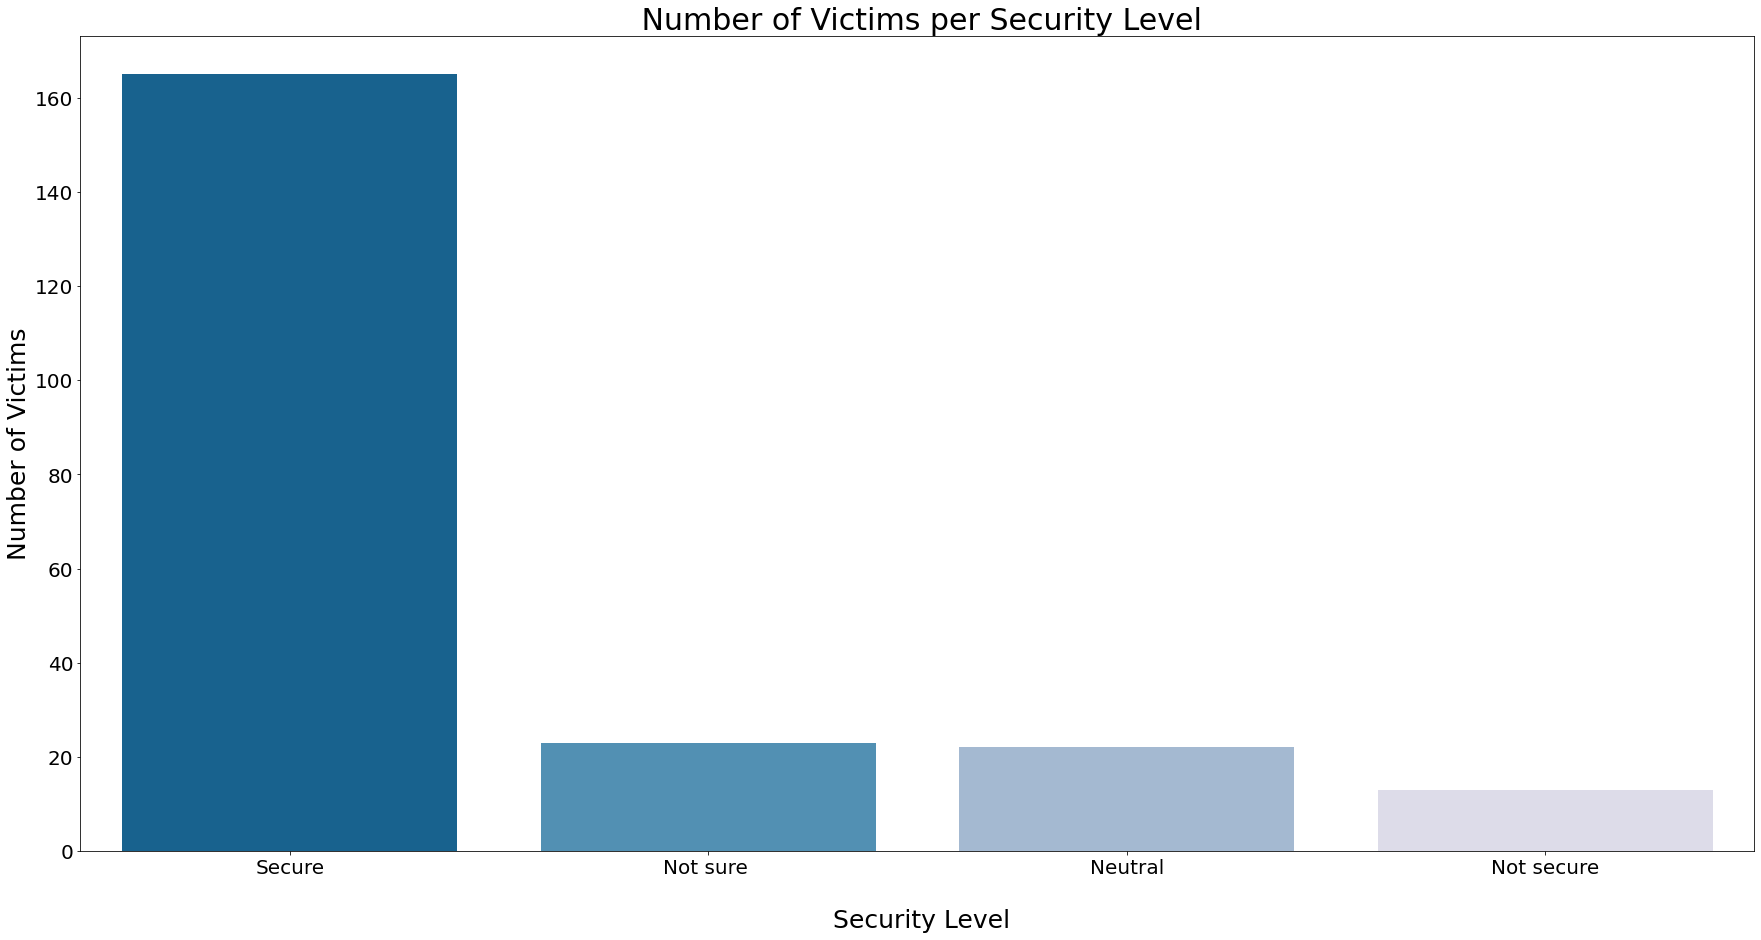

In [8]:
df["secure_level"] = df["secure_level"].replace(['Very secure'],["Secure"])

index = df[f1]["secure_level"].value_counts().index
values = df[f1]["secure_level"].value_counts().values
plt.figure(figsize = (30,15))
a= sns.barplot(x= index,y = values , data=df, palette=sns.color_palette("PuBu_r",4),alpha=1)
a.set_title(' Number of Victims per Security Level', size=30, y=1)
a.set_xlabel('\n Security Level', fontsize='25', horizontalalignment='center')
a.set_ylabel('Number of Victims', fontsize='25', horizontalalignment='center')
a.tick_params(axis='both', labelsize=20)
plt.show()



### #Most people agree with avoiding disclose personal information 

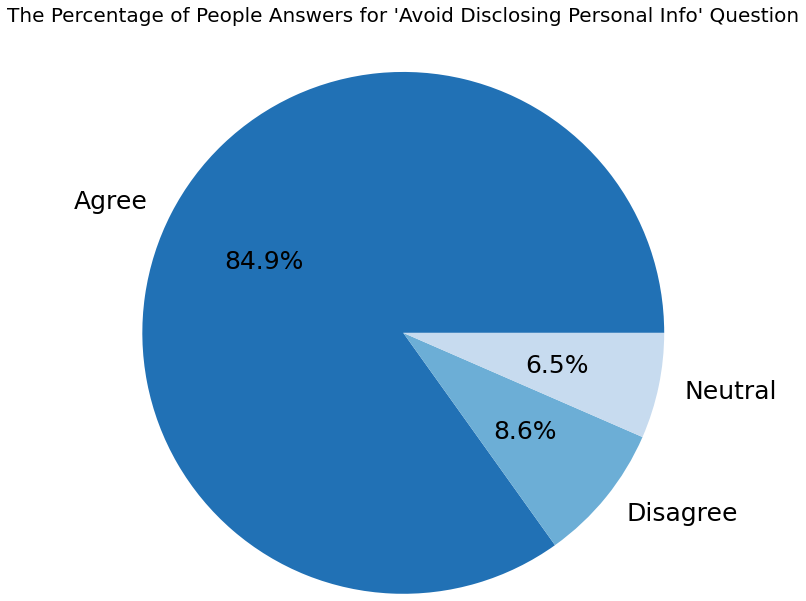

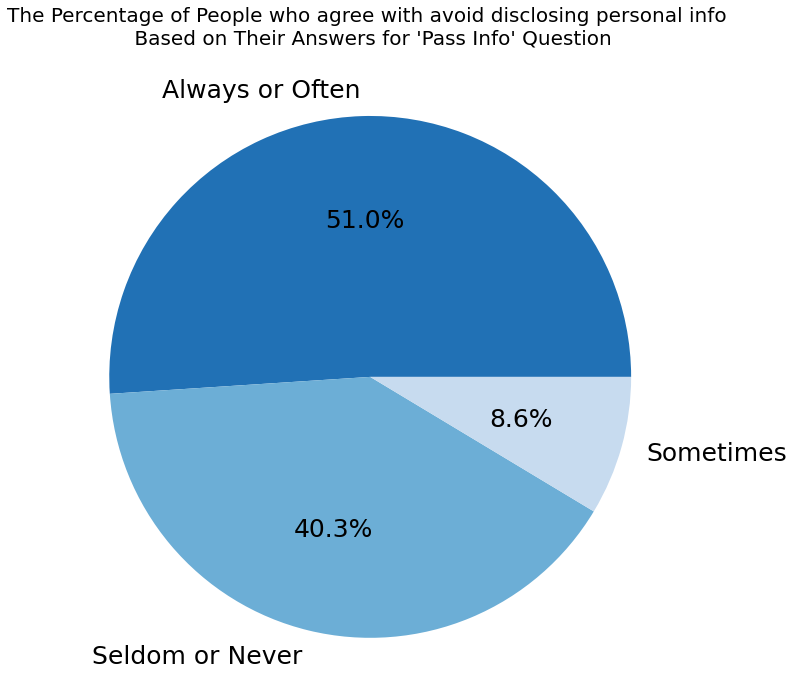

In [9]:
df["avoid_disclosing"] = df["avoid_disclosing"].replace(['Strongly Agree','Strongly Disagree'],
                                                                                    ["Agree","Disagree"])
                                                                                    
df["pass_my_info"] = df["pass_my_info"].replace(['Always','Often','Sometimes','Seldom','Never'],
                                                ['Always or Often','Always or Often','Sometimes','Seldom or Never','Seldom or Never'])                                                            

avoid_info= pd.DataFrame({'Values':df["avoid_disclosing"].value_counts().values},
                  index=df["avoid_disclosing"].value_counts().index)
#plot 1
textprops = {"fontsize":25}
avoid_info.plot.pie(y='Values', figsize=(8, 8),  autopct='%1.1f%%', legend=False,
                    colors= sns.color_palette("Blues_r",3), wedgeprops={'alpha':1},radius = 1.5,textprops=textprops)
plt.title("The Percentage of People Answers for 'Avoid Disclosing Personal Info' Question\n\n\n\n",size=20, y=1)
plt.axis('off')
plt.show(); 

avoid = df["avoid_disclosing"] == 'Agree'
pass_info= pd.DataFrame({'Values': df[avoid]["pass_my_info"].value_counts().values},
                  index=df[avoid]["pass_my_info"].value_counts().index)

pass_info.plot.pie(y='Values', figsize=(8, 8),  autopct='%1.1f%%', legend=False,colors= sns.color_palette("Blues_r",3), wedgeprops={'alpha':1},radius = 1.5,textprops=textprops)
plt.title("The Percentage of People who agree with avoid disclosing personal info \n Based on Their Answers for 'Pass Info' Question\n\n\n\n\n",size=20, y=1)
plt.axis('off')
plt.show(); 

### #Whats are the top channels that people use to raise their awareness on cyber crimes?

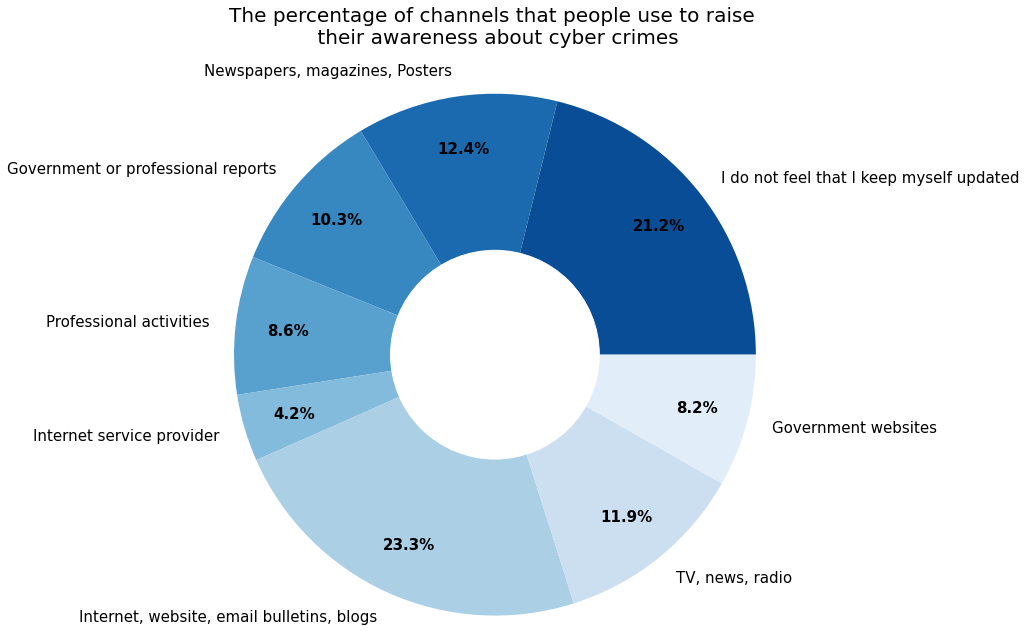

In [10]:
df['updated_about_CC(_Online Sources)'] = df['updated_about_CC(_Online Sources)'].str.replace('((e.g. CERT)) ?','')
df['updated_about_CC(_Online Sources)'] = df['updated_about_CC(_Online Sources)'].str.replace('etc.?','')

feel =0
Newspapers=0
reports=0
activities=0
provider=0
for i in df["updated_about_CC_(offline Sources)"]:
        feel=feel+i.count('feel')
        Newspapers=Newspapers+i.count('magazines')
        reports=reports+i.count('reports')
        activities=activities+i.count('activities')
        provider=provider+i.count('provider')
        
feelo =0
Internet=0
TV=0
Government=0
for i in df['updated_about_CC(_Online Sources)']:
        feelo=feelo+i.count('feel')
        Internet=Internet+i.count('Internet')
        TV=TV+i.count('TV')
        Government=Government+i.count('Government')
        
feel = feel + feelo
df_update_Sources = pd.DataFrame({'values': [feel, Newspapers, reports,activities,provider, Internet, TV,Government]},
                  index=['I do not feel that I keep myself updated', 'Newspapers, magazines, Posters', 
                         'Government or professional reports','Professional activities', 
                         'Internet service provider','Internet, website, email bulletins, blogs', 
                         'TV, news, radio','Government websites'])

fig, ax = plt.subplots(figsize=(8,8))

# create the pie plot
textprops = {"fontsize":15}
patche, value_name , value = ax.pie(df_update_Sources['values'].values, 
        labels = df_update_Sources['values'].index,
        autopct='%1.1f%%', 
        textprops=textprops,
        pctdistance=0.8,
        colors= sns.color_palette("Blues_r",8),
        wedgeprops={'alpha':1},
        radius = 1.5,
       )

# add circle to the middle for making the  donut chart
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.gcf().gca().add_artist(my_circle)

plt.setp(value, 
         fontweight='bold',
         color='black')
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.92)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

plt.title("The percentage of channels that people use to raise \n their awareness about cyber crimes\n\n\n\n",size=20)

plt.show()

### #Which party is more responsible for raising the awareness of cyber crimes?

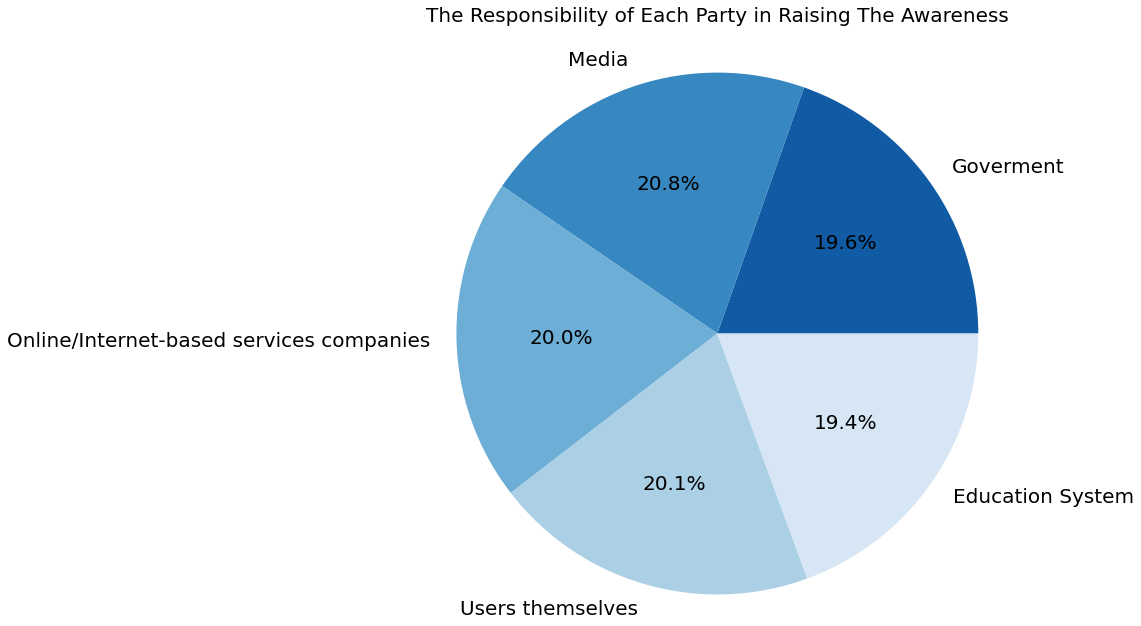

In [11]:
gov=df["government_responsible"].value_counts()[:2].sum()
media=df["media_responsible"].value_counts()[:2].sum()
telecome=df["tele_responsible"].value_counts()[:2].sum()
users=df["user_responsible"].value_counts()[:2].sum()
edu=df["education_responsible"].value_counts()[:2].sum()

spreading_awareness = pd.DataFrame({'Authority': [gov, media, telecome,users,edu]},
                  index=['Goverment', 'Media', 'Online/Internet-based services companies', 'Users themselves', 'Education System'])

textprops = {"fontsize":20}
spreading_awareness.plot.pie(y='Authority', figsize=(8, 8),  autopct='%1.1f%%', legend=False,colors= sns.color_palette("Blues_r",5), wedgeprops={'alpha':1},radius = 1.5,textprops=textprops)
plt.title("The Responsibility of Each Party in Raising The Awareness\n\n\n\n",size=20, y=1)
plt.axis('off')

plt.show();